### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant. (ex, profit from A and B)   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
 
coffee_full = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if **the mean height of all individuals** in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$

`2.` What is the population mean height?  What is the standard deviation of the population heights? What is the sample mean height? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  What is the standard deviation of the sampling distribution of the mean of five draws?

In [3]:
# population height mean and standard deviation
coffee_full.height.mean(), coffee_full.height.std()

(67.59748697307937, 3.119433206550344)

In [4]:
# sampling 
sample1 = coffee_full.sample(5)
sample1.height.mean()

67.9754986070742

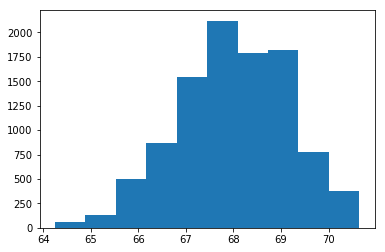

In [5]:
# 10000 sampling and the distribution of their statistics - 'means' of 10000.
sampling_dist_mean5 = []

for _ in range(10000):
    bootstrap_sample = sample1.sample(5, replace=True)
    bootstrap_mean = bootstrap_sample.height.mean()
    sampling_dist_mean5.append(bootstrap_mean)

plt.hist(sampling_dist_mean5);

In [6]:
std_sampling_dist = np.std(sampling_dist_mean5); std_sampling_dist

1.1737458377805681

`3.` Using the null and alternative set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

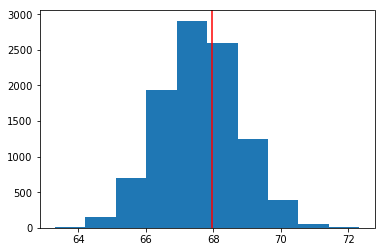

In [7]:
null_mean = 67.60
null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)

plt.hist(null_vals);

# where our sample mean falls on null distribution
plt.axvline(x=sample1.height.mean(), color = 'red');

In [8]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

prob_more_extreme_high = (null_vals > obs_mean).mean()
prob_more_extreme_low = (null_vals < null_mean - (obs_mean - null_mean)).mean()

pval = prob_more_extreme_low + prob_more_extreme_high; pval

0.74280000000000002

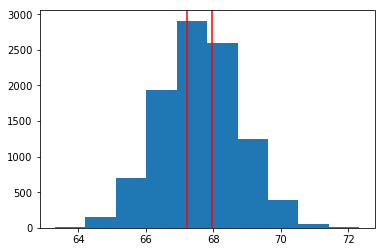

In [9]:
# let's see where our sample mean falls on the null distribution
lower_bound = null_mean - (obs_mean - null_mean)
upper_bound = obs_mean

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red');
plt.axvline(x=upper_bound, color = 'red');

In [11]:
null_mean = 67.60  

# this is another way to compute the standard deviation of the sampling distribution theoretically  
std_sampling_dist = coffee_full.height.std()/np.sqrt(5)  
num_sims = 10000

null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)  
low_ext = (null_mean - (sample1.height.mean() - null_mean))  
high_ext = sample1.height.mean()  

(null_sims > high_ext).mean() + (null_sims < low_ext).mean()

0.79190000000000005

`4.` Now, imagine you received the same sample mean you calculated from the sample in question 2 above, but with a sample of 1000.  What would the new standard deviation be for your sampling distribution for the mean of 1000 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  

In [12]:
# get standard deviation for a sample size of 1000
sample2 = coffee_full.sample(1000)
sampling_dist_mean1000 = []
for _ in range(10000):
    bootstrap_sample = sample2.sample(1000, replace=True)
    bootstrap_mean = bootstrap_sample.height.mean()
    sampling_dist_mean1000.append(bootstrap_mean)
    
std_sampling_dist1000 = np.std(sampling_dist_mean1000)
std_sampling_dist1000

0.099515069810618501

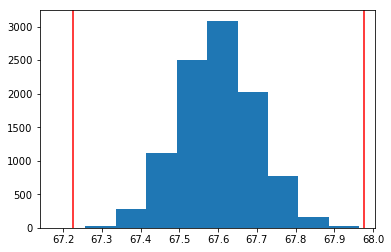

In [13]:
null_vals = np.random.normal(null_mean, std_sampling_dist1000, 10000)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red');
plt.axvline(x=upper_bound, color = 'red');

In [14]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

prob_more_extreme_low = (null_vals < lower_bound).mean()
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high; pval

0.00020000000000000001